In [1]:
from nba_py import player
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests 

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)


%matplotlib inline

In [110]:
bpm = pd.read_csv("lebron - BPM per playoffs.csv").iloc[:,1:8]
vorp = pd.read_csv("lebron - VORP per playoffs.csv").iloc[:,1:8]
# print(bpm.columns.values[1:-1])
df = bpm.merge(vorp, on=['Player', 'Season', 'Age', 'Tm', 'Lg', 'G'])
df = df[(df.BPM != 'BPM') & (df.VORP != 'VORP')]
df.VORP = df.VORP.astype(float)
df.BPM = df.BPM.astype(float)
# df.dtypes
df.reset_index(inplace=True)

df = df.iloc[:25,:]
df['avg'] = (df['BPM'] + df['VORP'] )/2
df.sort_values(by = 'avg', ascending=False, inplace=True)
df

,index,Player,Season,Age,Tm,Lg,G,BPM,VORP,avg
0,0,LeBron James,2017-18,33,CLE,NBA,18,14.7,3.1,8.90
1,1,Michael Jordan,1989-90,26,CHI,NBA,16,14.3,2.8,8.55
2,2,Michael Jordan,1990-91,27,CHI,NBA,17,13.8,2.8,8.30
3,3,LeBron James,2015-16,31,CLE,NBA,21,13.1,3.1,8.10
4,4,Michael Jordan,1988-89,25,CHI,NBA,17,12.8,2.7,7.75
6,6,Tim Duncan,2002-03,26,SAS,NBA,24,11.6,3.5,7.55
8,8,LeBron James,2011-12,27,MIA,NBA,23,11.0,3.2,7.10
5,5,Russell Westbrook,2015-16,27,OKC,NBA,18,11.7,2.3,7.00
7,7,LeBron James,2016-17,32,CLE,NBA,18,11.5,2.5,7.00
9,9,LeBron James,2014-15,30,CLE,NBA,20,11.0,2.7,6.85


In [24]:
players = df.Player.unique()
playerList = [x.lower().split(" ") for x in players]
# print(player.get_player('lebron', 'james', only_current=0))
ids = [player.get_player(p[0],p[1]) for p in playerList]

ids = [i.tolist()[0] for i in ids]
  

In [158]:
# for i in ids:
    
#     url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/{}.png'.format(i)
#     r = requests.get(url)
    
#     open('{}.jpg'.format(i), 'wb').write(r.content)


In [111]:
df2 = pd.DataFrame({'Player': players,
     'playerID': ids
    })
df3 = df.merge(df2, on='Player', how='left')
df3.iloc[:,1:9]

,Player,Season,Age,Tm,Lg,G,BPM,VORP
0,LeBron James,2017-18,33,CLE,NBA,18,14.7,3.1
1,Michael Jordan,1989-90,26,CHI,NBA,16,14.3,2.8
2,Michael Jordan,1990-91,27,CHI,NBA,17,13.8,2.8
3,LeBron James,2015-16,31,CLE,NBA,21,13.1,3.1
4,Michael Jordan,1988-89,25,CHI,NBA,17,12.8,2.7
5,Tim Duncan,2002-03,26,SAS,NBA,24,11.6,3.5
6,LeBron James,2011-12,27,MIA,NBA,23,11.0,3.2
7,Russell Westbrook,2015-16,27,OKC,NBA,18,11.7,2.3
8,LeBron James,2016-17,32,CLE,NBA,18,11.5,2.5
9,LeBron James,2014-15,30,CLE,NBA,20,11.0,2.7


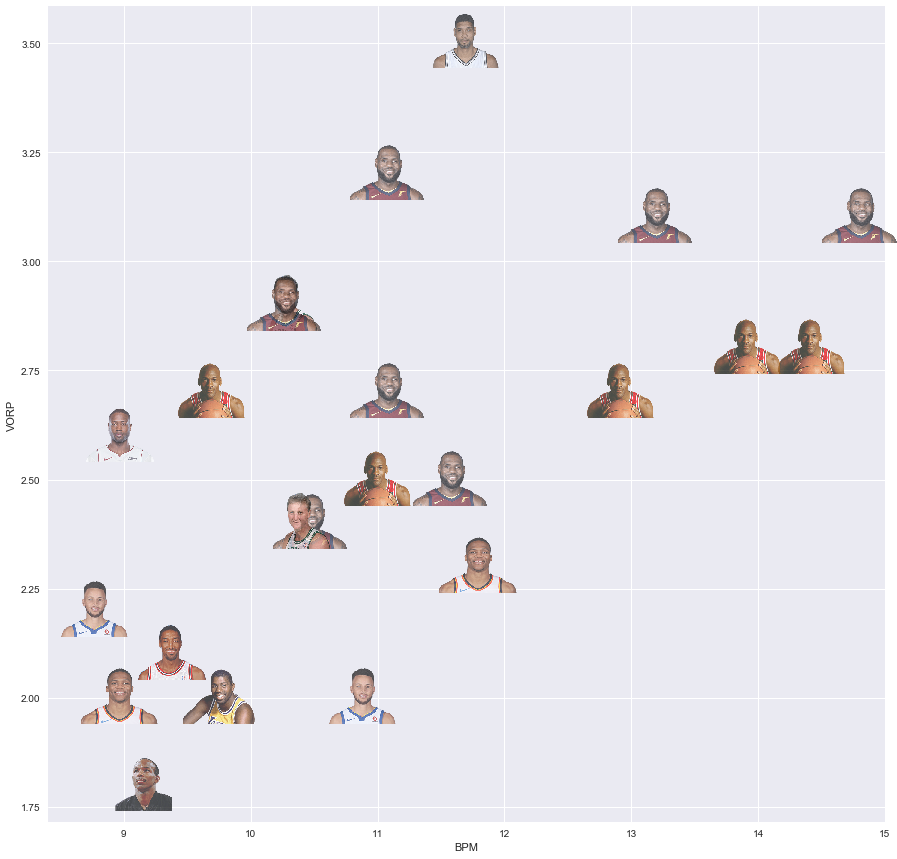

In [105]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)

# df3.sort_values(by = 'BPM', ascending=False, inplace=True)

# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groups = df.groupby('Player')
for name, group in groups:
    ax.plot(group.BPM, group.VORP, marker='', linestyle='', ms=12, label=name)

for n in range(df.shape[0]):
    
    try: 
        arr_img = plt.imread("{}.jpg".format(df3.playerID[n]), format='jpg')
        imagebox = OffsetImage(arr_img, zoom=0.3, alpha=.7 )
        ab = AnnotationBbox(imagebox, (df3.BPM[n],df3.VORP[n]),
                        xycoords='data',
                        frameon=False,
                        boxcoords="offset points"
                    
                        )

        ax.add_artist(ab)
    except OSError:
        pass
#         print(n)
    # imagebox.image.axes = ax

    
    
# ax.legend()
ax.set_xlabel('BPM')
ax.set_ylabel('VORP')
fig.savefig('season-bpm-playoffs-image.png')

C:\Users\swlaforest\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


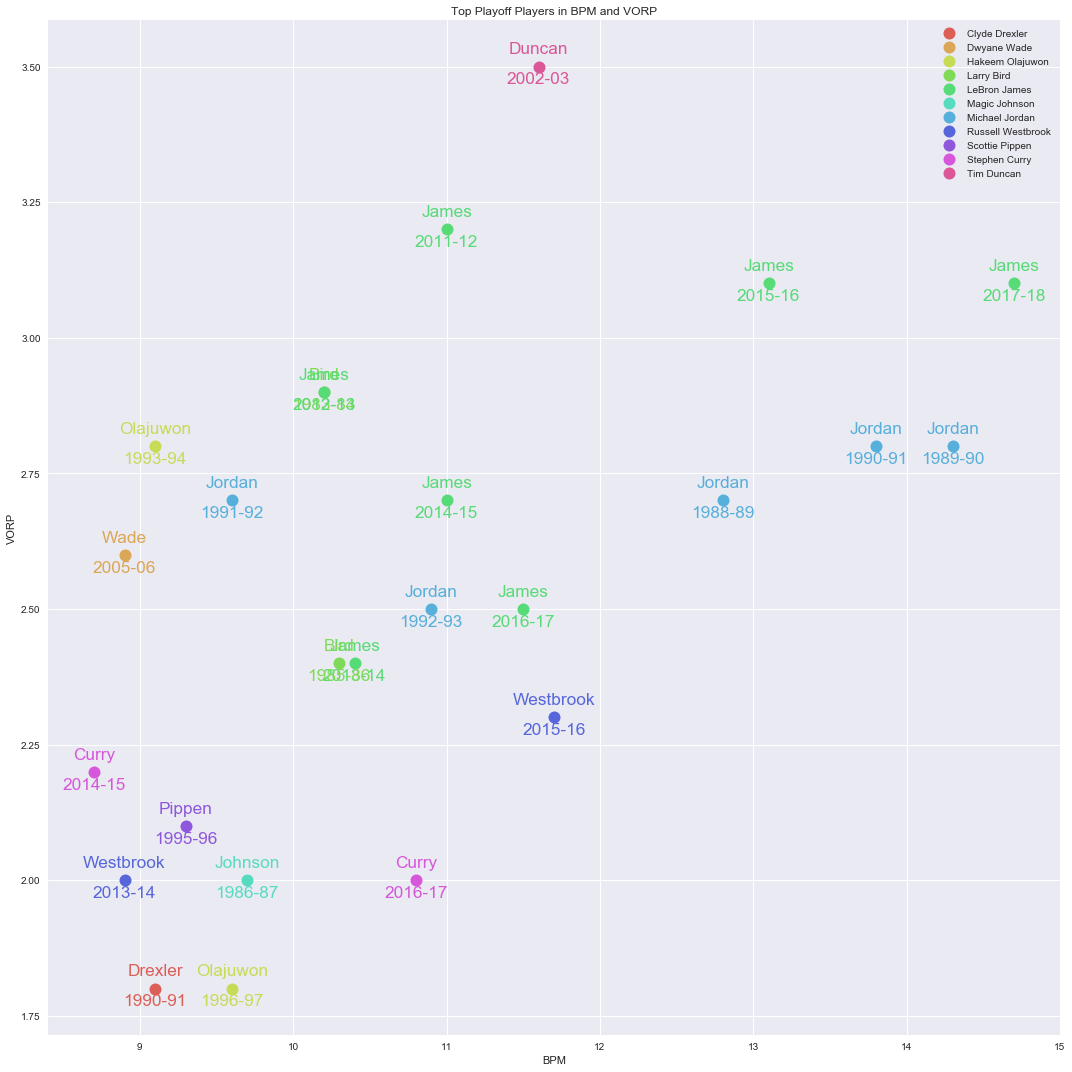

In [202]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
df['Color'] = df.Player

# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groups = df.sort_values(['avg'],ascending=False).groupby('Player')
for name, group in groups:
    ind = df.index[df['Player'] == name].tolist()
    
    p = ax.plot(group.BPM, group.VORP, marker='o', linestyle='', ms=12,label=name)
    
    for i in ind:
        df['Color'][i] = [p[-1].get_color()][0]

for n in range(df.shape[0]):
    
    ax.annotate(df.Player[n].split(" ")[1], xy=(df.BPM[n], df.VORP[n]),  xycoords='data',
            xytext=(0., 10), textcoords='offset points',color=df.Color[n],
            horizontalalignment='center', verticalalignment='bottom', size='xx-large'
            )
    ax.annotate(df.Season[n], xy=(df.BPM[n], df.VORP[n]),  xycoords='data',
            xytext=(0., -20), textcoords='offset points',color=df.Color[n],
        
            horizontalalignment='center', verticalalignment='bottom',size='xx-large'
            )
    
ax.legend()
ax.set_title('Top Playoff Players in BPM and VORP')
ax.set_xlabel('BPM')
ax.set_ylabel('VORP')
fig.tight_layout()
fig.savefig('season-bpm-playoffs.png')

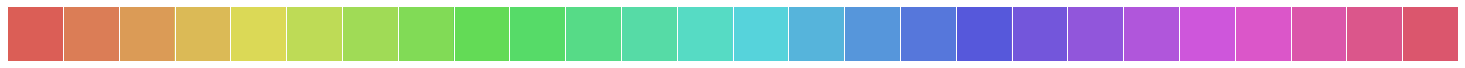

In [218]:
sns.set_palette("hls", 11)
sns.palplot(sns.color_palette("hls", 26))

IndexError: list index out of range

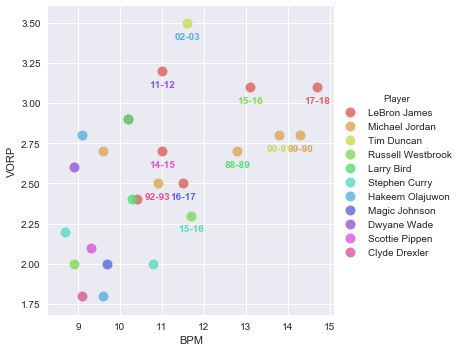

In [195]:
p = sns.lmplot('BPM','VORP',data=df,fit_reg=False, # Don't fix a regression line
           hue='Player',
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100})

for line in range(0,df.shape[0]):
     p.axes[0][0].text(df.BPM[line]-.3, df.VORP[line]-.1, df.Season[line][2:], horizontalalignment='left', size='medium', color=sns.color_palette()[line], weight='semibold')

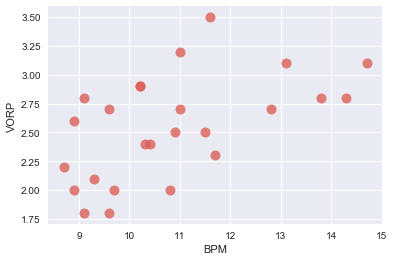

In [203]:
p = sns.regplot('BPM','VORP',data=df,fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100})
p

In [215]:
bpmAll = pd.read_csv("lebron - BPM all time.csv").iloc[:,1:8]
vorpAll = pd.read_csv("lebron - VORP all time.csv").iloc[:,1:8]

dfAll = bpmAll.merge(vorpAll, on=['Player', 'From','To','Tm','Lg','G'])
dfAll = dfAll[(dfAll.BPM != 'BPM') & (dfAll.VORP != 'VORP')]
dfAll.VORP = dfAll.VORP.astype(float)
dfAll.BPM = dfAll.BPM.astype(float)
# df.dtypes
dfAll.reset_index(inplace=True)

dfAll = dfAll.iloc[:25,:]
dfAll['avg'] = (dfAll['BPM'] + dfAll['VORP'] )/2
dfAll.sort_values(by = 'avg', ascending=False, inplace=True)
dfAll.head()

,index,Player,From,To,Tm,Lg,G,BPM,VORP,avg
0,0,LeBron James,2006,2018,TOT,NBA,235,11.0,32.5,21.75
1,1,Michael Jordan,1985,1998,CHI,NBA,179,10.1,22.8,16.45
4,4,Magic Johnson,1980,1996,LAL,NBA,190,7.4,17.8,12.60
17,17,Tim Duncan,1998,2016,SAS,NBA,251,5.9,18.6,12.25
8,8,Larry Bird,1980,1992,BOS,NBA,164,6.9,15.4,11.15


C:\Users\swlaforest\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


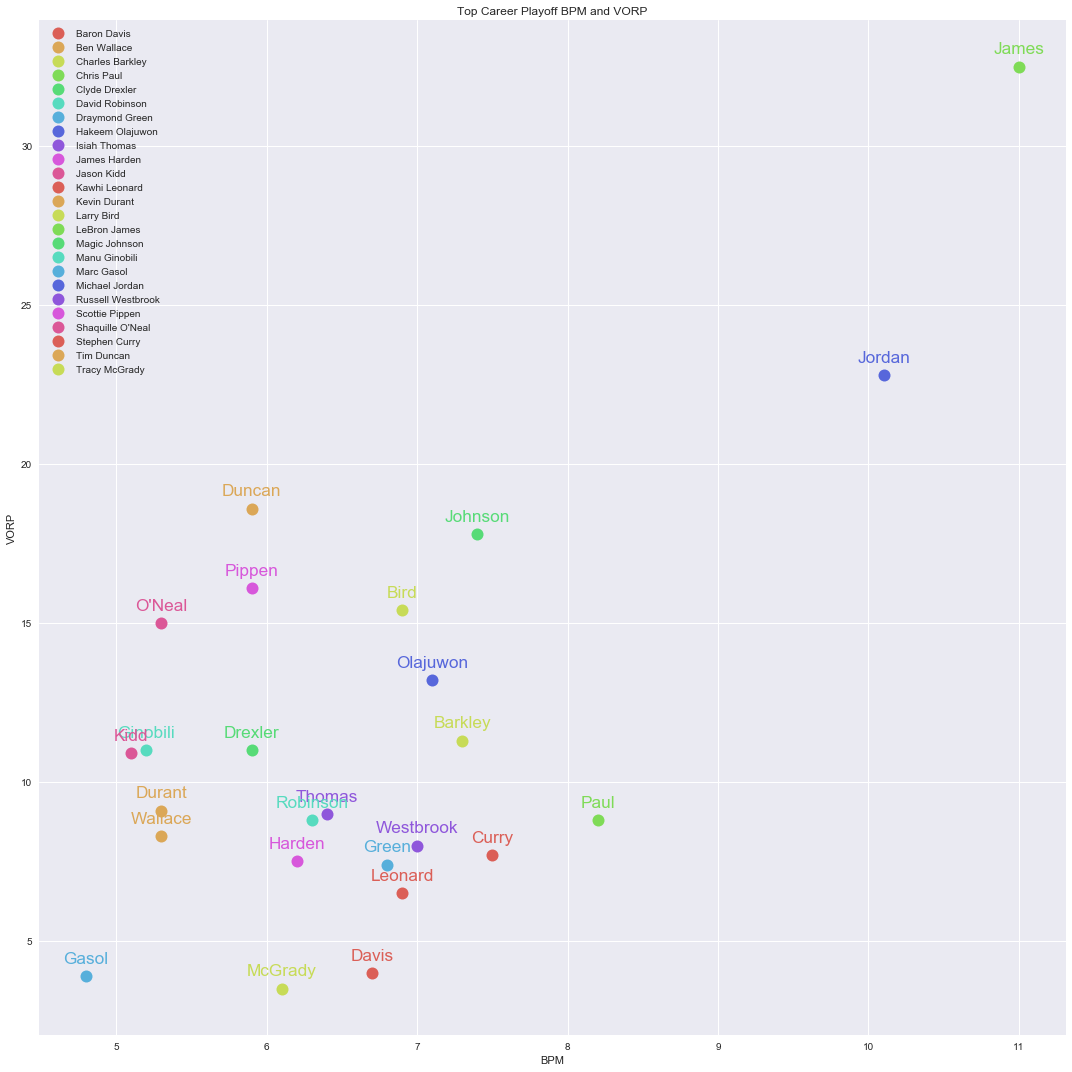

In [221]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
dfAll['Color'] = dfAll.Player

# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groups = dfAll.sort_values(['avg'],ascending=False).groupby('Player')
for name, group in groups:
    ind = dfAll.index[dfAll['Player'] == name].tolist()
    
    p = ax.plot(group.BPM, group.VORP, marker='o', linestyle='', ms=12,label=name)
    
    for i in ind:
        dfAll['Color'][i] = [p[-1].get_color()][0]

for n in range(df.shape[0]):
    
    ax.annotate(dfAll.Player[n].split(" ")[1], xy=(dfAll.BPM[n], dfAll.VORP[n]),  xycoords='data',
            xytext=(0., 10), textcoords='offset points',color=dfAll.Color[n],
            horizontalalignment='center', verticalalignment='bottom', size='xx-large'
            )
    
ax.legend()
ax.set_title('Top Career Playoff BPM and VORP')
ax.set_xlabel('BPM')
ax.set_ylabel('VORP')
fig.tight_layout()
fig.savefig('all-bpm-playoffs.png')